<a href="https://colab.research.google.com/github/Munanom/Entropy_DT/blob/main/Logistic_Regression_URL.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [ ]:
#load data set
data = pd.read_csv("/content/sample_data/urlset.csv", encoding='ISO-8859-1')
data

<ipython-input-3-272beee10477>:2: DtypeWarning: Columns (12) have mixed types. Specify dtype option on import or set low_memory=False.
  data = pd.read_csv("/content/sample_data/urlset.csv", encoding='ISO-8859-1')


,domain,ranking,mld_res,mld.ps_res,card_rem,ratio_Rrem,ratio_Arem,jaccard_RR,jaccard_RA,jaccard_AR,jaccard_AA,jaccard_ARrd,jaccard_ARrem,label
0,nobell.it/70ffb52d079109dca5664cce6f317373782/...,10000000,1,0,18.0,107.611111,107.277778,0.000000,0.000000,0.000000,0.000000,0.800000,0.795729,1.0
1,www.dghjdgf.com/paypal.co.uk/cycgi-bin/webscrc...,10000000,0,0,11.0,150.636364,152.272727,0.000000,0.000000,0.000000,0.000000,0.000000,0.768577,1.0
2,serviciosbys.com/paypal.cgi.bin.get-into.herf....,10000000,0,0,14.0,73.500000,72.642857,0.000000,0.000000,0.000000,0.000000,0.000000,0.726582,1.0
3,mail.printakid.com/www.online.americanexpress....,10000000,0,0,6.0,562.000000,590.666667,0.000000,0.000000,0.000000,0.000000,0.000000,0.85964,1.0
4,thewhiskeydregs.com/wp-content/themes/widescre...,10000000,0,0,8.0,29.000000,24.125000,0.000000,0.000000,0.000000,0.000000,0.000000,0.748971,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95908,xbox360.ign.com/objects/850/850402.html,339,1,1,2.0,142.500000,141.000000,0.009009,0.009091,0.006536,0.006601,0.450980,0.846906,0.0
95909,games.teamxbox.com/xbox-360/1860/Dead-Space/,63029,1,0,3.0,114.000000,128.333333,0.002899,0.002577,0.002907,0.002584,0.750000,0.714623,0.0
95910,www.gamespot.com/xbox360/action/deadspace/,753,1,1,3.0,91.000000,101.333333,0.000000,0.003106,0.000000,0.000000,0.111111,0.648571,0.0
95911,en.wikipedia.org/wiki/Dead_Space_(video_game),6,1,1,4.0,682.000000,744.250000,0.033075,0.029412,0.030250,0.029145,0.809735,0.840323,0.0


In [ ]:
#find shape of data
data.shape

(51456, 14)

In [ ]:
#check the null data set
data.isnull().sum()

domain           0
ranking          0
mld_res          0
mld.ps_res       0
card_rem         0
ratio_Rrem       0
ratio_Arem       0
jaccard_RR       0
jaccard_RA       0
jaccard_AR       0
jaccard_AA       1
jaccard_ARrd     1
jaccard_ARrem    1
label            3
dtype: int64

<Axes: >

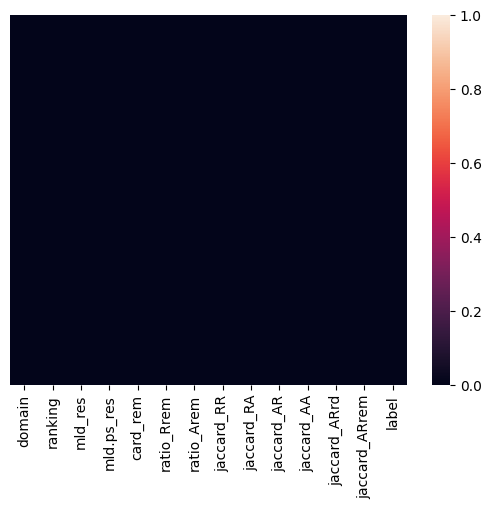

In [ ]:
#draw the heat map
sns.heatmap(data.isnull(), yticklabels=False, cbar=True, cmap='rocket')

In [ ]:
#describe the data
data.describe()

,ranking,mld_res,mld.ps_res,card_rem,ratio_Rrem,ratio_Arem,jaccard_RR,jaccard_RA,jaccard_AR,jaccard_AA,jaccard_ARrd,label
count,5.145600e+04,51456.000000,51456.000000,51456.000000,51456.000000,51456.000000,51456.000000,51456.000000,51456.000000,51455.000000,51455.000000,51453.000000
mean,8.108164e+06,0.239700,0.101329,6.165810,130.643853,133.004839,0.001106,0.001071,0.000969,0.001010,0.152052,0.930986
std,3.891429e+06,0.426904,0.305289,5.265725,133.325623,143.720884,0.013950,0.012845,0.012687,0.014068,0.288112,0.253481
min,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,1.000000e+07,0.000000,0.000000,2.000000,54.000000,49.500000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
50%,1.000000e+07,0.000000,0.000000,5.000000,111.625000,111.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
75%,1.000000e+07,0.000000,0.000000,9.000000,168.513889,171.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
max,1.000000e+07,1.000000,11.000000,151.909091,2992.000000,3309.500000,0.747283,0.627660,0.639626,0.805233,1.000000,1.000000


<ipython-input-11-40b52873825e>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='label', data=data, palette='magma')


<Axes: xlabel='label', ylabel='count'>

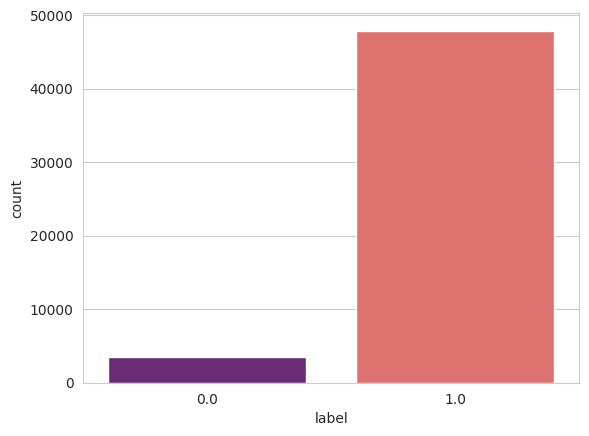

In [ ]:
#draw a countplot
sns.set_style('whitegrid')
sns.countplot(x='label', data=data, palette='magma')

<Axes: xlabel='label', ylabel='count'>

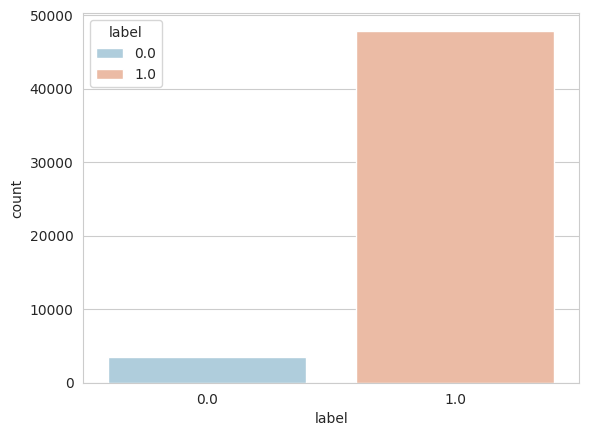

In [ ]:
#draw another countplot
sns.set_style('whitegrid')
sns.countplot(x='label', hue='label',data=data, palette='RdBu_r')

In [ ]:
#drop null values
data.dropna()

,domain,ranking,mld_res,mld.ps_res,card_rem,ratio_Rrem,ratio_Arem,jaccard_RR,jaccard_RA,jaccard_AR,jaccard_AA,jaccard_ARrd,jaccard_ARrem,label
0,nobell.it/70ffb52d079109dca5664cce6f317373782/...,10000000,1,0,18.0,107.611111,107.277778,0.000000,0.000000,0.000000,0.000000,0.800000,0.795729,1.0
1,www.dghjdgf.com/paypal.co.uk/cycgi-bin/webscrc...,10000000,0,0,11.0,150.636364,152.272727,0.000000,0.000000,0.000000,0.000000,0.000000,0.768577,1.0
2,serviciosbys.com/paypal.cgi.bin.get-into.herf....,10000000,0,0,14.0,73.500000,72.642857,0.000000,0.000000,0.000000,0.000000,0.000000,0.726582,1.0
3,mail.printakid.com/www.online.americanexpress....,10000000,0,0,6.0,562.000000,590.666667,0.000000,0.000000,0.000000,0.000000,0.000000,0.85964,1.0
4,thewhiskeydregs.com/wp-content/themes/widescre...,10000000,0,0,8.0,29.000000,24.125000,0.000000,0.000000,0.000000,0.000000,0.000000,0.748971,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
51450,www.gm-workwear.com/index.htm,10000000,0,0,2.0,57.000000,54.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.681818,0.0
51451,www.snickers.se/Snickers/Corp/,10000000,1,0,2.0,28.500000,26.500000,0.333333,0.263158,0.263158,0.283019,0.789474,0.746032,0.0
51452,www.freewebs.com/jaclothier/,5001,1,1,1.0,15.000000,14.000000,0.000000,0.000000,0.000000,0.000000,0.370370,0.705882,0.0
51453,buccanada.com/Recycling/,10000000,0,0,1.0,29.000000,21.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.612903,0.0


<Axes: >

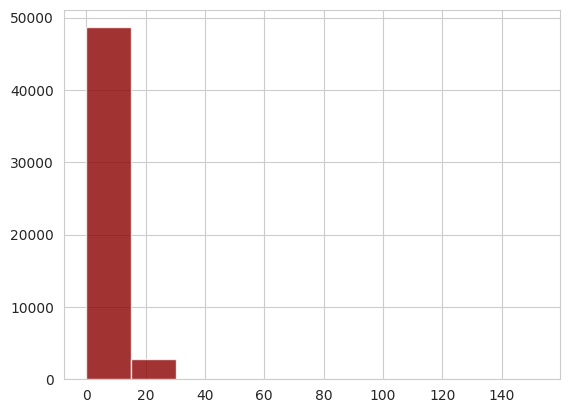

In [ ]:
#draw hsitogram
data['card_rem'].hist(bins=10, color='darkred', alpha=0.8)

<Axes: xlabel='mld.ps_res', ylabel='count'>

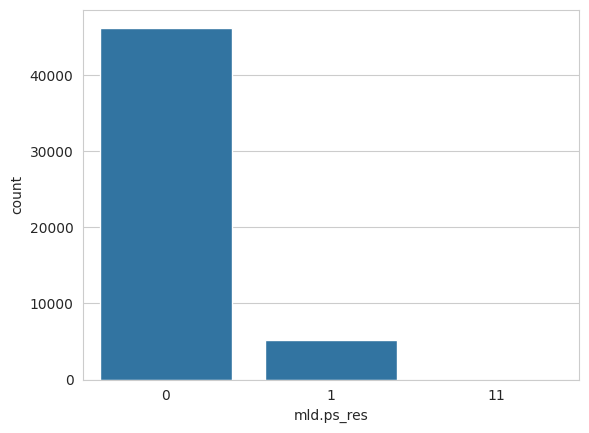

In [ ]:
#draw a countplot
sns.countplot(x='mld.ps_res', data=data)

In [ ]:
#check for the null data
data.isnull().sum()

domain           0
ranking          0
mld_res          0
mld.ps_res       0
card_rem         0
ratio_Rrem       0
ratio_Arem       0
jaccard_RR       0
jaccard_RA       0
jaccard_AR       0
jaccard_AA       1
jaccard_ARrd     1
jaccard_ARrem    1
label            3
dtype: int64

In [ ]:
#drop rows
data.dropna(inplace=True)

In [ ]:
#check the data which is bull
data.isnull().sum()

domain           0
ranking          0
mld_res          0
mld.ps_res       0
card_rem         0
ratio_Rrem       0
ratio_Arem       0
jaccard_RR       0
jaccard_RA       0
jaccard_AR       0
jaccard_AA       0
jaccard_ARrd     0
jaccard_ARrem    0
label            0
dtype: int64

In [ ]:
#drop the domain column
data.drop(['domain'], axis=1,inplace=True)

In [ ]:
#import the sklearn
from sklearn.model_selection import train_test_split

In [ ]:
#divide data into train and test
X_train,X_test,Y_train,Y_test =train_test_split(data.drop('label',axis=1),data['label'], test_size=0.2, random_state=101)

In [ ]:

#import logistic regression
from sklearn.linear_model import LogisticRegression

In [ ]:
#equate logmodel
logmodel = LogisticRegression()

In [ ]:
logmodel

LogisticRegression()

In [ ]:
#view X_train
X_train

,ranking,mld_res,mld.ps_res,card_rem,ratio_Rrem,ratio_Arem,jaccard_RR,jaccard_RA,jaccard_AR,jaccard_AA,jaccard_ARrd,jaccard_ARrem
16880,10000000,0,0,1.0,101.000000,104.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.708333
24633,10000000,0,0,9.0,71.888889,68.111111,0.000000,0.000000,0.000000,0.000000,0.000000,0.81295
34971,10000000,0,0,3.0,8.333333,3.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.259259
40633,4570,1,1,14.0,107.000000,104.857143,0.004651,0.004065,0.002663,0.002037,0.571429,0.818516
48367,3103,1,1,2.0,70.000000,72.000000,0.000000,0.000000,0.000000,0.000000,0.789474,0.721212
...,...,...,...,...,...,...,...,...,...,...,...,...
5695,10000000,0,0,14.0,177.285714,180.357143,0.000000,0.000000,0.000000,0.000000,0.000000,0.768008
8006,10000000,0,0,1.0,208.000000,330.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.511236
17745,10000000,0,0,5.0,128.400000,130.800000,0.000000,0.000000,0.000000,0.000000,0.000000,0.807531
17931,10000000,0,0,2.0,229.000000,236.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.845238


In [ ]:
#Y tain
Y_train

16880    1.0
24633    1.0
34971    1.0
40633    1.0
48367    0.0
        ... 
5695     1.0
8006     1.0
17745    1.0
17931    1.0
45921    1.0
Name: label, Length: 41162, dtype: float64

In [ ]:
logmodel.fit(X_train,Y_train)

LogisticRegression()

In [ ]:
#predictions
predictions = logmodel.predict(X_test)

In [ ]:
#predictions
predictions

array([1., 1., 1., ..., 1., 1., 1.])

In [ ]:
from sklearn.metrics import auc, accuracy_score, classification_report,log_loss, confusion_matrix

In [ ]:
print(classification_report(Y_test,predictions))

              precision    recall  f1-score   support

         0.0       0.00      0.00      0.00       688
         1.0       0.93      1.00      0.97      9603

    accuracy                           0.93     10291
   macro avg       0.47      0.50      0.48     10291
weighted avg       0.87      0.93      0.90     10291



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Axes(0.125,0.11;0.62x0.77)


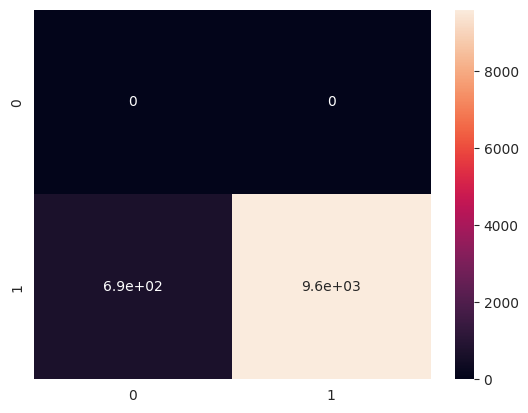

In [ ]:
#display the confusion matrix
print(sns.heatmap(confusion_matrix(predictions, Y_test), annot=True))

In [ ]:
pip install scikit-plot

In [ ]:
import scikitplot as skplt

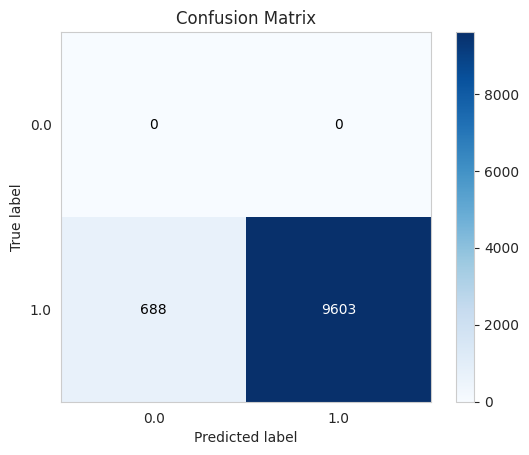

In [ ]:
skplt.metrics.plot_confusion_matrix(predictions, Y_test)
plt.show()

In [ ]:
predicted_probas = logmodel.predict_proba(X_test)

In [ ]:
predicted_probas

array([[0.04268757, 0.95731243],
       [0.04268757, 0.95731243],
       [0.04268757, 0.95731243],
       ...,
       [0.04268757, 0.95731243],
       [0.04268757, 0.95731243],
       [0.04268757, 0.95731243]])

In [ ]:
accuracy = accuracy_score(Y_test, predictions)
print(f"Accuracy: {accuracy}")

Accuracy: 0.9331454669128365
